<a href="https://colab.research.google.com/github/Shivachikkonda02/-Bank-Marketing-Analysis-and-Classification-ML-Project/blob/main/Bike_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import r2_score,mean_squared_error

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [5]:
df=pd.read_csv("/content/hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
df.shape

(17379, 17)

In [7]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
# Droping columns which are not important

df.drop(['instant','dteday','yr','atemp'],axis=1,inplace=True)

In [12]:
df.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.75,0.0,0,1,1


In [13]:
df.groupby('holiday')['cnt'].sum()

holiday
0    3214244
1      78435
Name: cnt, dtype: int64

In [14]:
df.groupby('workingday')['cnt'].sum()

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64

In [15]:
df.groupby('season')['cnt'].sum()

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

In [16]:
df.groupby('weekday')['cnt'].sum()

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64

In [18]:
x=df.groupby('mnth')['cnt'].sum()
x

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

<ipython-input-21-c0a5ad44eb82>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cnt'],kde=False,bins=30)


<Axes: xlabel='cnt'>

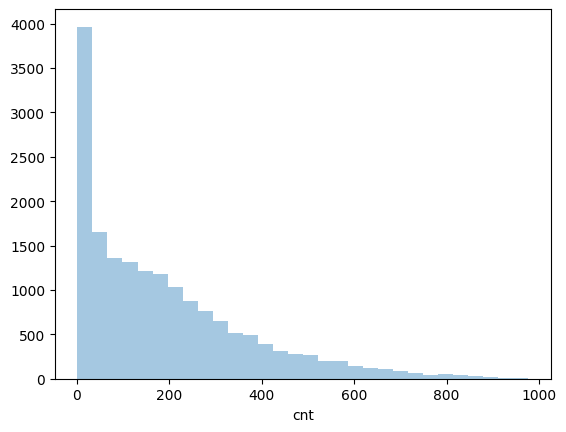

In [21]:
sns.distplot(df['cnt'],kde=False,bins=30)

In [22]:
corr=df.corr()
corr

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
season,1.000000,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.150625,-0.149773,0.120206,0.174226,0.178056
mnth,0.830386,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.006117,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,-0.009585,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,-0.002335,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.013743,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014524,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.312025,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,-0.069881,-0.023125,0.459616,0.335361,0.404772
hum,0.150625,0.164411,-0.276498,-0.010588,-0.037158,0.015688,0.418130,-0.069881,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.149773,-0.135386,0.137252,0.003988,0.011502,-0.011830,0.026226,-0.023125,-0.290105,1.000000,0.090287,0.082321,0.093234


In [23]:
print(corr['cnt'].sort_values(ascending=False))

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
hr            0.394071
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64


In [24]:
df.drop(['weekday','mnth','windspeed','holiday'],axis=1,inplace=True)

In [25]:
df.head()

,season,hr,workingday,weathersit,temp,hum,casual,registered,cnt
0,1,0,0,1,0.24,0.81,3,13,16
1,1,1,0,1,0.22,0.80,8,32,40
2,1,2,0,1,0.22,0.80,5,27,32
3,1,3,0,1,0.24,0.75,3,10,13
4,1,4,0,1,0.24,0.75,0,1,1


In [26]:
x=df.drop('cnt',axis=1)
y=df['cnt']

In [27]:
x

,season,hr,workingday,weathersit,temp,hum,casual,registered
0,1,0,0,1,0.24,0.81,3,13
1,1,1,0,1,0.22,0.80,8,32
2,1,2,0,1,0.22,0.80,5,27
3,1,3,0,1,0.24,0.75,3,10
4,1,4,0,1,0.24,0.75,0,1
...,...,...,...,...,...,...,...,...
17374,1,19,1,2,0.26,0.60,11,108
17375,1,20,1,2,0.26,0.60,8,81
17376,1,21,1,1,0.26,0.60,7,83
17377,1,22,1,1,0.26,0.56,13,48


In [28]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

In [30]:
cv=ShuffleSplit(n_splits=10,test_size=0.3,random_state=42)

In [31]:
print(cross_val_score(LinearRegression(),x,y,cv=cv,scoring='r2'))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [33]:
print(cross_val_score(LinearRegression(),x,y,cv=cv,scoring='r2').mean())

1.0


In [37]:
print(cross_val_score(RandomForestRegressor(),x,y,cv=cv,scoring='r2'))

[0.99982696 0.99965332 0.99970139 0.99967951 0.99971329 0.99974002
 0.99982658 0.99977401 0.99975504 0.99987124]


In [38]:
print(cross_val_score(RandomForestRegressor(),x,y,cv=cv,scoring='r2').mean())

0.9997556504854878


In [39]:
print(cross_val_score(XGBRegressor(),x,y,cv=cv,scoring='r2'))

[0.99955024 0.99928318 0.99942071 0.99931434 0.99954305 0.99943593
 0.99957026 0.9993766  0.99936906 0.99950143]


In [40]:
print(cross_val_score(XGBRegressor(),x,y,cv=cv,scoring='r2').mean())

0.9994364800925013


In [41]:
rf=RandomForestRegressor()

In [42]:
lr=LinearRegression()

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [44]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [45]:
prediction=rf.predict(x_test)

In [46]:

print(np.sqrt(mean_squared_error(y_test,prediction)))

2.260165778855497


In [47]:
lr.fit(x_train,y_train)

LinearRegression()

In [48]:

prediction=lr.predict(x_test)

In [49]:
print(np.sqrt(mean_squared_error(y_test,prediction)))

1.518942671017454e-13
